RECIPE SITE TRAFFIC


This data set has 947 rows and 9 columns.I have validated all variables and i have replace the missing value with 0. I have make some changes to high_traffic columns, "high" to 1 and others to 0.

In [1]:
# Necessary cells for analysis
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,f1_score
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
# Total number of missing values
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [5]:
# validate possible values
df['recipe'].nunique()

947

In [7]:
# validate possible values
df['calories'].nunique()



891

In [8]:
# validate possible values
df['carbohydrate'].nunique()

835

In [10]:
# validate possible values
df['sugar'].nunique()

666

In [11]:
# validate possible values
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [12]:
# validate 6 possile values
df['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [13]:
# validate two possible values
df['high_traffic'].unique()



array(['High', nan], dtype=object)

In [14]:
# Replace the missing values with 0
df.fillna(0,inplace = True)



In [15]:
# Replace the value "high" from high_traffic with 1
df['high_traffic'].replace("High",1 , inplace =True)

In [16]:
# Recheck if there is any missing value
df.isnull().sum()



recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [17]:
# Validate any negative values in the numeric varibles 
df.describe()

,recipe,calories,carbohydrate,sugar,protein,high_traffic
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,412.001668,33.143992,8.549799,22.823252,0.606125
std,273.519652,451.463971,43.465360,14.418229,35.781906,0.488866
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,237.500000,88.215000,6.770000,1.450000,2.290000,0.000000
50%,474.000000,264.130000,19.440000,4.140000,9.640000,1.000000
75%,710.500000,576.225000,42.590000,9.285000,28.530000,1.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,1.000000


EXPLORATORY ANALYSIS


The target variable in this scenario is "traffic to the rest of the websites" that means "high_traffic". To perform exploratory analysis, we would need to identify the relevant features or variables that could affect traffic to the website, such as recipe popularity, recipe type,etc. Let's perform visualizations to explore the relationships between the target variable and the relevant features. We can use different statistical methods to see the correlation between the variables, identify any outliers, and understand the underlying patterns in the data.

Many of the recipes in the category are famous but breakfast is the famous one clearly shown in the visulization below and most amount of servings is 4,also most of them generate high amount of traffic as shown in countplot.

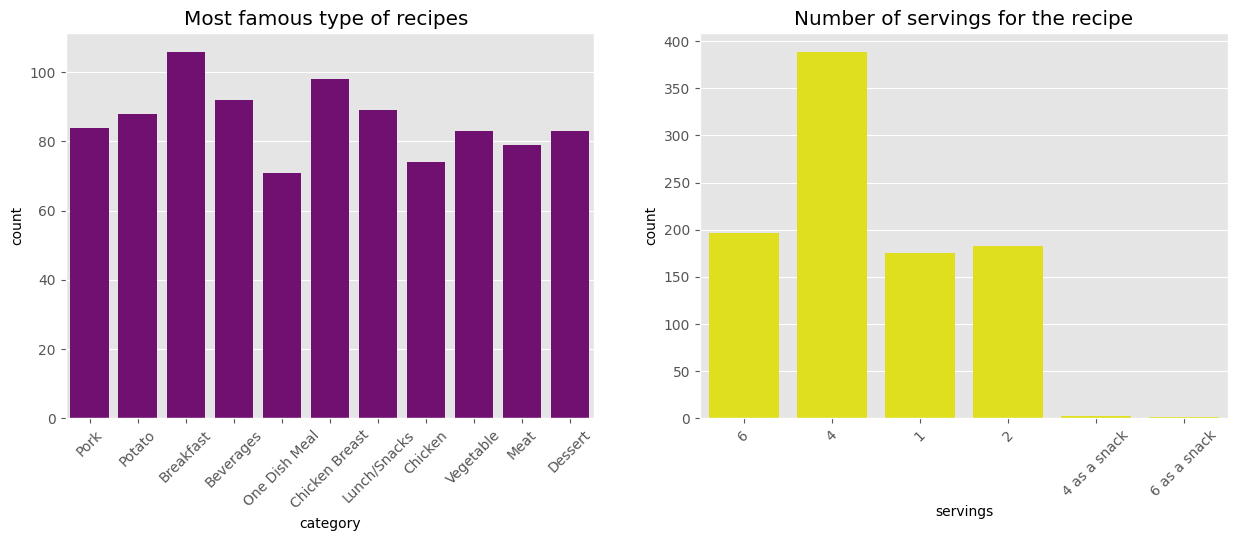

In [20]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=df['category'], color='purple',ax=axes[0]).set(title='Most famous type of recipes ')
sns.countplot(x=df['servings'],color='yellow',ax=axes[1]).set(title='Number of servings for the recipe')
axes[0].tick_params(axis='x', labelrotation=45)
axes[1].tick_params(axis='x', labelrotation=45);
plt.show()

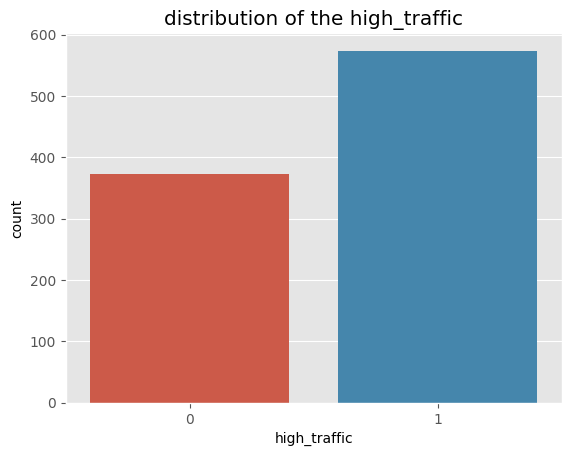

In [19]:
sns.countplot(x = "high_traffic",data =df)
plt.title("distribution of the high_traffic")
plt.show()



Numeric Variables: high_traffic,recipe,calories,carbohydrate,sugar,protein,servings

From the heatmap,we can conclude that there is moderate to strong negative correlation between the numeric variables. And from the scatterplot also it has shown same results, that means that as one variable increases, the other decreases, and vice versa.

/tmp/ipykernel_5051/1799146360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');


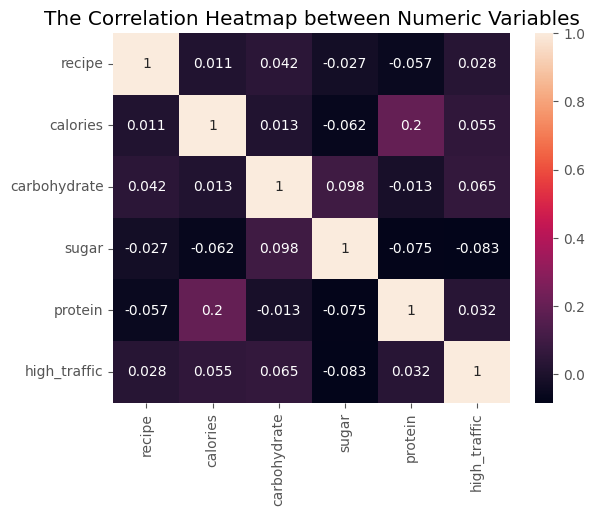

In [21]:

sns.heatmap(df.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');



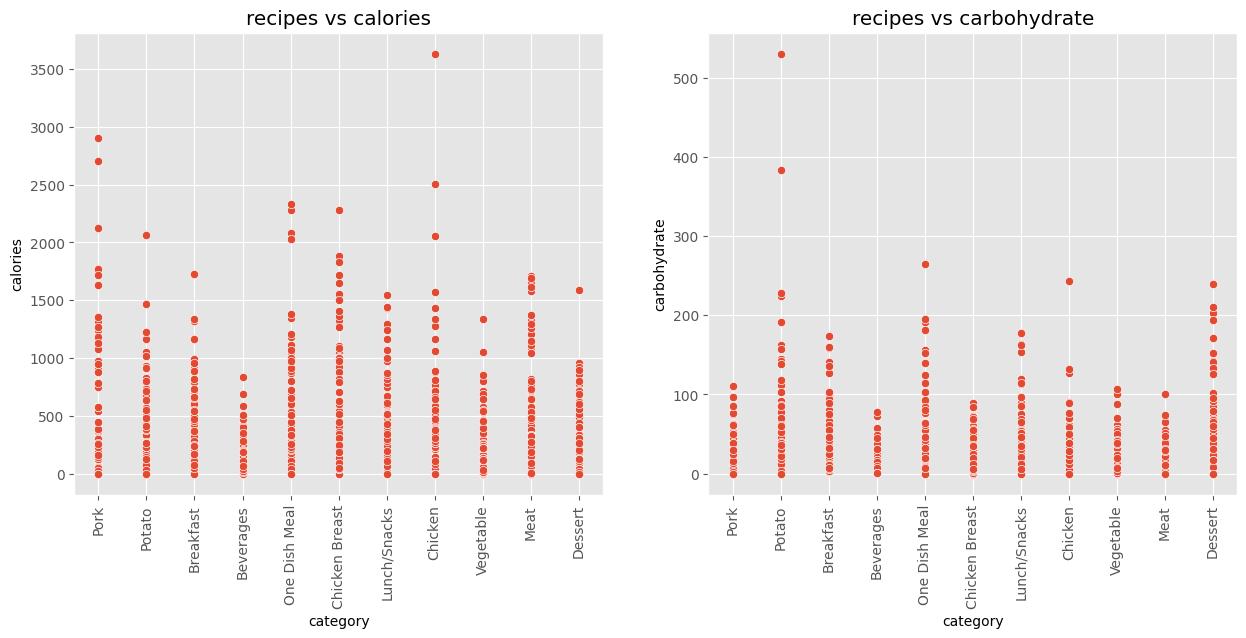

In [22]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(x=df['category'],y=df['calories'],ax=axes[0]).set(title='recipes vs calories')
sns.scatterplot(x=df['category'],y=df['carbohydrate'],ax=axes[1]).set(title='recipes vs carbohydrate')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

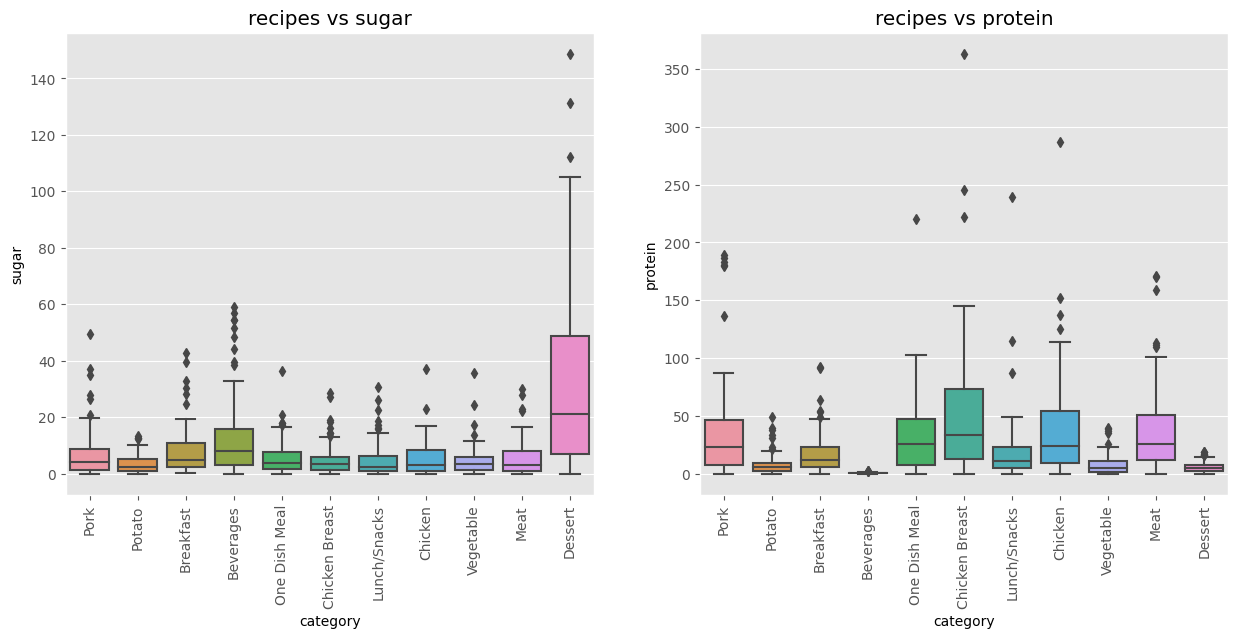

In [23]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x=df['category'],y=df['sugar'],ax=axes[0]).set(title='recipes vs sugar')
sns.boxplot(x=df['category'],y=df['protein'],ax=axes[1]).set(title='recipes vs protein')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

Relationship between category and high traffic

As we can see form the barplot below,Most of recipes lead high traffic but Vegetable stand out the most following potato,pork,One dish Meal , Meat and so on.

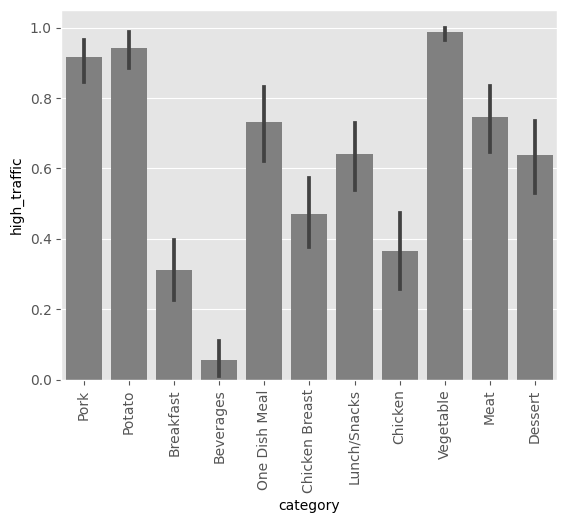

In [24]:
sns.barplot(x= "category" ,color = "grey", y ="high_traffic",data = df)
plt.tick_params(axis='x', labelrotation=90)
plt.show()

Model fitting and Evaluation


Product team want us to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes. we have to:

Predict which recipes will lead to high traffic?
Correctly predict high traffic recipes 80% of the time?
For this, i am choosing Logistic regression beacause it is a classification algorithm that is specifically designed to predict binary outcomes, it is easy to train ,fast to predict and it gives an estimate of the probability of the target variable for each input. For the comparison model i will use Decision tree Classifier ,they are easy to interpret and can provide insight into which variables are most important in determining the outcome, making it possible to determine the key factors that drive traffic to certain recipes.

For the evaluation, I am choosing roc_curve and roc_auc_score to evaluate the model because they provide a more nuanced view of the classifier's performance and can be used to determine the optimal threshold for making a positive prediction.


Prepare Data For Modelling:

To enable modelling, we choose calories,carbohydrate,sugar,protein,category,servings as features and high_traffic as target variables.

I also have made the following changes:

-Convert the categorical variables into numeric features

-Split the data into a training set and a test set

In [25]:
labelencoder = LabelEncoder()
df['category'] = labelencoder.fit_transform(df['category'])
df['servings'] = labelencoder.fit_transform(df['servings'])

In [26]:
feature_cols = ['recipe','calories','carbohydrate','sugar','protein','category','servings']
X = df[feature_cols] # Features
y = df['high_traffic'] # Target variable

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.716986553269739


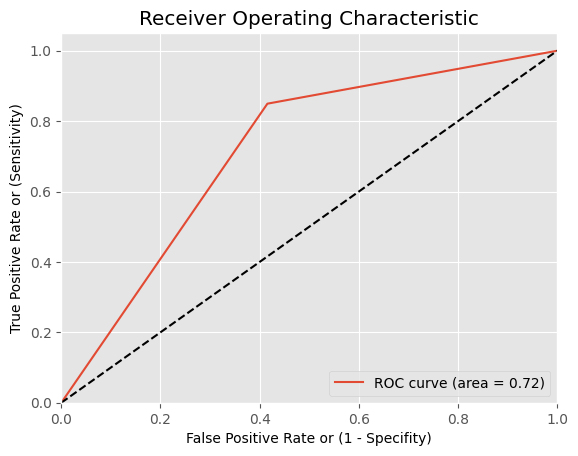

In [37]:
log_reg = LogisticRegression( C = 0.1 , penalty = 'l2')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
print(roc_auc)
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_log_reg)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

FINDING THE FEATURE IMPORTANCE

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Get the feature importances
coefs = log_reg.coef_[0]

# Create a list of feature names
feature_names = X.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'coef': coefs})

# Sort the dataframe by feature importance
feature_importances.sort_values(by='coef', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)

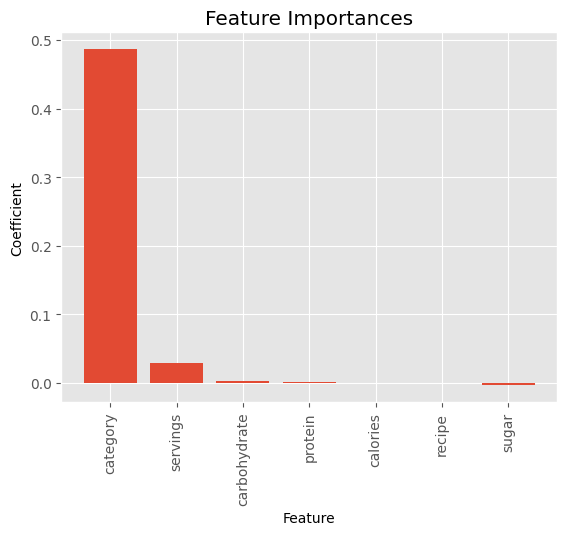

In [29]:
# Plot the feature importances
plt.bar(feature_importances['feature'], feature_importances['coef'])
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

FINDING THE BEST PARAMETER

In [ ]:

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

# Create the grid search object
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

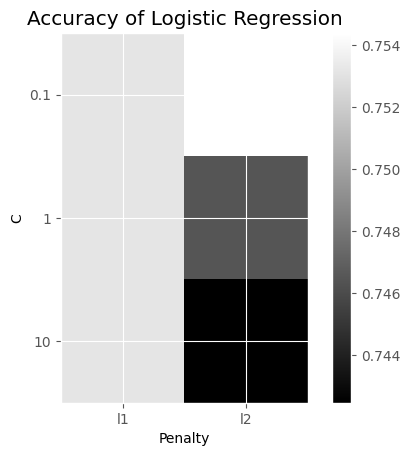

In [36]:
# visulizing it 
# Get the results of the grid search
results = grid_search.cv_results_

# Extract the mean test score for each combination of parameters
scores = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['penalty']))

# Create a heatmap of the test scores
plt.imshow(scores, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.xlabel('Penalty')
plt.ylabel('C')
plt.xticks(np.arange(len(param_grid['penalty'])), param_grid['penalty'])
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Accuracy of Logistic Regression')
plt.show()

DECISION TREE CLASSIFIER

0.7533042179059879


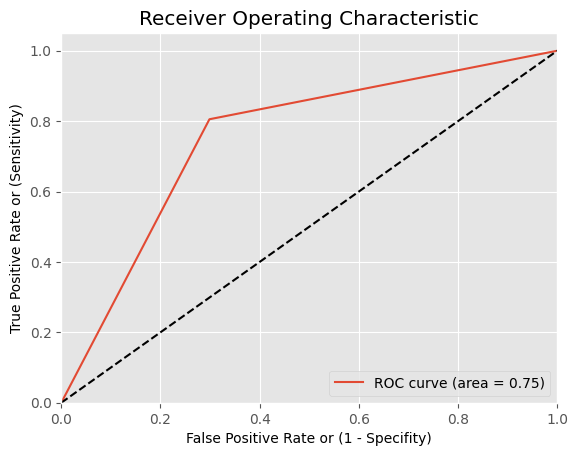

In [43]:
# Train the model
dt_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 2,min_samples_leaf = 1,min_samples_split = 2)
dt_clf.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_clf.predict(X_test)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test,dt_y_pred)
print(roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,dt_y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

FINDING THE FEATURE IMPORTANCES 

In [38]:
# Train the random forest classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Get the feature importances
importances = dt_clf.feature_importances_

# Create a list of feature names
feature_names = X.columns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by feature importance
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Print the feature importances
print(feature_importances)

        feature  importance
5      category    0.339288
4       protein    0.156282
0        recipe    0.133414
1      calories    0.123130
3         sugar    0.123114
2  carbohydrate    0.089798
6      servings    0.034974


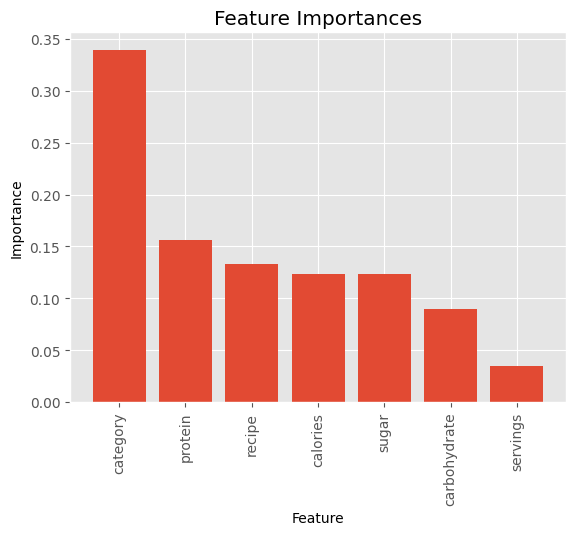

In [39]:
# Plot the feature importances
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

FINDING THE BEST PARAMETER

In [40]:
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Train the Decision Tree Classifier using Grid Search
grid_search = GridSearchCV(dt_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.7622952248170094


In [41]:
# Define the parameter grid for grid search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Train the Decision Tree Classifier using Grid Search
grid_search = GridSearchCV(dt_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)



Best parameters:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.7622952248170094



This below plot shows the mean test score for each parameter combination tested in the grid search, along with the standard deviation of the test scores. The x-axis shows the index of the parameter combination, and the y-axis shows the mean test score.

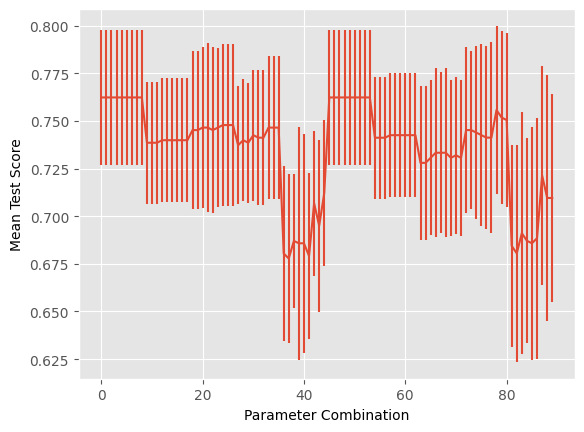

In [42]:
# visulizing it
# Extract the results of the grid search
results = grid_search.cv_results_

# Extract the mean test scores
mean_test_scores = results['mean_test_score']

# Extract the standard deviation of the test scores
std_test_scores = results['std_test_score']

# Extract the parameters that were tested
params = results['params']

# Plot the mean test scores
plt.errorbar(range(len(params)), mean_test_scores, yerr=std_test_scores)
plt.xlabel('Parameter Combination')
plt.ylabel('Mean Test Score')
plt.show()

Results:

The ROC AUC score of 0.75 for Decision tree classifier means that the model has a good ability to distinguish between positive and negative classes, whereas the ROC AUC score of 0.71 for Logistic regression means that the model's performance is not as good.So, we choose decision tree classifier as better performing model.

roc_auc score (close to 1) indicates that the model is capable of correctly classifying positive cases as positive, and negative cases as negative, with a high true positive rate and a low false positive rate. A roc_auc score of 0.5, on the other hand, would indicate that the model is no better than random chance.

EVALUATE BY BUSINESS CRITERIA

The company wants to predict which recipes will lead to high traffic and correctly predict high traffic recipes 80% of the time So, i will use a combination of precision ,recall and f1 as the KPI.

The precision of the decision tree classifier is 0.80, which is higher than that of logistic regression, indicating that the model is better at avoiding false positive predictions. The recall of the decision tree classifier is 0.81, which is slightly lower than that of logistic regression, indicating that the model is not as good at finding all the high traffic recipes. The F1-score of the decision tree classifier is 0.80, which is the same as that of logistic regression, indicating that the model has a similar balance between precision and recall as logistic regression.

In conclusion, based on the F1-score and recall scores, the logistic regression classifier is likely the better choice for this problem, as it provides a better balance between precision and recall and is better at detecting all actual positive samples.

Precision: 0.75
Recall Score: 0.85
F1 Score: 0.80


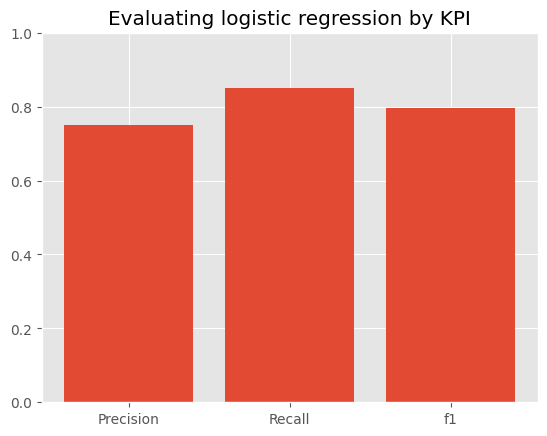

In [44]:
# Evaluate the model
prec = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
# Output the results
print("Precision: {:.2f}".format(prec))
print("Recall Score: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# Plotting the scores
plt.bar(["Precision", "Recall","f1"], [prec, recall,f1])
plt.ylim(0, 1) # Set the y-axis limit to 0-1 for the scores
plt.title("Evaluating logistic regression by KPI")
plt.show()



Precision: 0.80
Recall Score: 0.81
F1 score:0.80


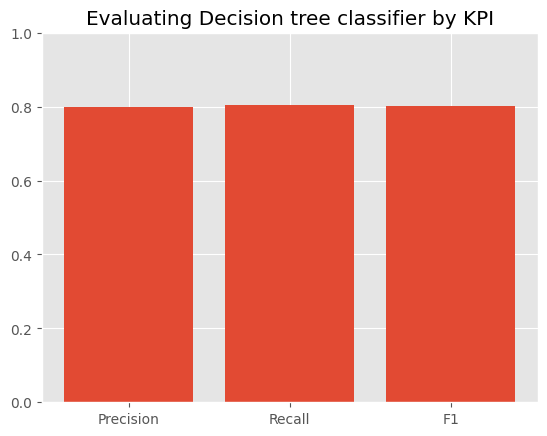

In [45]:
prec1 = precision_score(y_test, dt_y_pred)
recall1 = recall_score(y_test, dt_y_pred)
f11 = f1_score(y_test, dt_y_pred)
# Output the results
print("Precision: {:.2f}".format(prec1))
print("Recall Score: {:.2f}".format(recall1))
print("F1 score:{:.2f}".format(f11))
# Plotting the scores
plt.bar(["Precision", "Recall","F1"], [prec1, recall1,f11])
plt.ylim(0, 1) # Set the y-axis limit to 0-1 for the scores
plt.title("Evaluating Decision tree classifier by KPI")
plt.show()

RECOMMENDATIONS

Based on the analysis of the data,the goals of the business problem and the model evaluations, it appears that the decision tree classifier may perform better for this problem. The decision tree classifier has a higher precision score, recall score, and F1 score compared to the logistic regression model. The decision tree classifier also has a higher ROC-AUC score compared to the logistic regression model. By using decision tree classifer we can improve customer experience ,By presenting users with high traffic recipes, the business can improve the user experience and increase engagement on its website

The business should undertake the recommended actions to improve the performance of the model and ensure that it continues to meet the goals and requirements.

In order to further improve the performance of the model, it is recommended that the business:

1.Collect more data and perform feature engineering to improve the quality and representativeness of the data.

2.Ensemble models: Consider combining multiple models to form an ensemble model that can leverage the strengths of different models.

3.Implement a feedback loop: Continuously monitor the performance of the model, collect feedback,make necessary updates to improve its accuracy over time and make adjustments as necessary to ensure that it continues to meet the business goals and requirements.